### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 4: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: 2 classes and 8 features

(2) Is the dataset class-balanced?

In [3]:
# ****** your code here ******
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Your answer**: The data set is unbalanced since it has 500 0s and 268 1s.

(3) For this classification problem, what is the baseline accuracy? Round into 3 decimal place.

In [4]:
# ****** your code here ******
baseline_accuracy = 500 / (500 + 268)
print("Baseline Accuracy is: %.3f" % baseline_accuracy)

Baseline Accuracy is: 0.651


## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [5]:
# Store all the features into variable "X"
# ****** your code here ******
X = X = df.iloc[:,0:8].values

# Store the output class values into variable "y" 
# ****** your code here ******

y = df.Outcome.values

# Split your X and y data using train_test_split 
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**:  Default penalty is l2 penalty


    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**Your answer**:  The resulting coefficients should be smaller


    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**:  We do not need add a column of 1s in your feature/design matrix. The default intercept is 0 here.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

[]

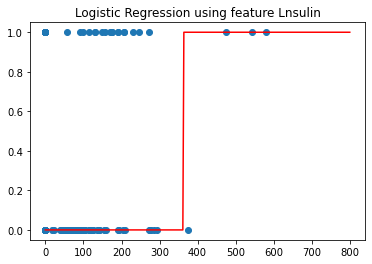

In [6]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
model = LogisticRegression(penalty='none', max_iter=10000)

# Obtain training data and test data  
# ****** your code here ******
XtrainLinsulin = Xtrain[:,4].reshape(-1, 1)
XtestLinsulin = Xtest[:,4].reshape(-1, 1)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
model.fit(XtrainLinsulin, ytrain)

# Create a scatter plot of the test data. 
# ****** your code here ******
ypred = model.predict(np.linspace(0, 800,300).reshape(-1, 1))
ytest_probLinsulin = model.predict_proba(XtestLinsulin)

plt.scatter(XtestLinsulin, ytest)
plt.title("Logistic Regression using feature Lnsulin")

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
sns.lineplot(x = np.linspace(0, 800,300), y = ypred, color = 'r')
plt.plot()

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [7]:
# ****** your code here ******
# You can either write a function or not
def compute_performance(ypred, ytest, classes):
    tp = sum(np.logical_and(ypred == classes[1], ytest == classes[1]))
    tn = sum(np.logical_and(ypred == classes[0], ytest == classes[0]))
    fp = sum(np.logical_and(ypred == classes[1], ytest == classes[0]))
    fn = sum(np.logical_and(ypred == classes[0], ytest == classes[1]))

    return tp, tn, fp, fn

ypred = model.predict(XtestLinsulin)
tp, tn, fp, fn = compute_performance(ypred, ytest, model.classes_)

Acc = (tp + tn) / (tp + tn + fp + fn)
print("Acc: %.5f" % Acc)
Recall = tp / (tp + fn)
print("Recall: %.5f" % Recall)
Precision = tp/(tp + fp)
print("Precision: %.5f" % Precision)
Sensitivity = tp / (tp + fn)
print("Sensitivity: %.5f" % Sensitivity)
Specificity = tn / (tn + fp)
print("Specificity: %.5f" % Specificity)



Acc: 0.70779
Recall: 0.06383
Precision: 0.75000
Sensitivity: 0.06383
Specificity: 0.99065


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [8]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
model = LogisticRegression(penalty='none', max_iter=10000)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
model.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred = model.predict(Xtest)
ytest_prob = model.predict_proba(Xtest)

# Evaluate the performance
# ****** your code here ******
tp, tn, fp, fn = compute_performance(ypred, ytest, model.classes_)
Acc = (tp + tn) / (tp + tn + fp + fn)
print("Acc: %.5f" % Acc)

Acc: 0.82468


Does using more features help to improve the classification?

**Your answer** : Yes, the accuracy increased.

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [9]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4
ytest_prob = model.predict_proba(Xtest)
ypred = model.classes_[(ytest_prob[:,1]>threshold).astype(int)]

# Evaluate the performance
# ****** your code here ******
tp, tn, fp, fn = compute_performance(ypred, ytest, model.classes_)
Acc = (tp + tn) / (tp + tn + fp + fn)
print("Acc: %.5f" % Acc)

Acc: 0.79221


In [10]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6

ytest_prob = model.predict_proba(Xtest)
ypred = model.classes_[(ytest_prob[:,1]>threshold).astype(int)]

# Evaluate the performance
# ****** your code here ******
tp, tn, fp, fn = compute_performance(ypred, ytest, model.classes_)
Acc = (tp + tn) / (tp + tn + fp + fn)
print("Acc: %.5f" % Acc)

Acc: 0.81818


What do you think is a better threshold? 

**Your answer**:  0.6 is the better threshold

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [11]:
# Create a LogisticRegression model with l2 regularization 
# ****** your code here ******
model = LogisticRegression(penalty="l2", max_iter=10000, C = 0.01)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
model.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred = model.predict(Xtest)
ytest_prob_l2 = model.predict_proba(Xtest)

# Evaluate the performance
# ****** your code here ******
tp, tn, fp, fn = compute_performance(ypred, ytest, model.classes_)
Acc = (tp + tn) / (tp + tn + fp + fn)
print("Acc: %.5f" % Acc)

Acc: 0.81169


Does regularization help to improve the classification?

**Your answer** : Since the accuracy decreased compared to 3.1, the regularization does not help

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

classifier (one feature): 0.536289520779479
classifier (all feature): 0.8663750248558362
classifier (all feature with l2): 0.8526546033008551


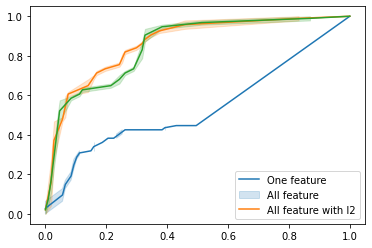

In [12]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
# ****** your code here ******
fpr1, tpr1, _ = roc_curve(ytest, ytest_probLinsulin[:,1], pos_label=1)
fpr2, tpr2, _ = roc_curve(ytest, ytest_prob[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(ytest, ytest_prob_l2[:,1], pos_label=1)

# Plot all of the ROC curves 
# ****** your code here ******
ax = sns.lineplot(x = fpr1,y = tpr1)
ax = sns.lineplot(x = fpr2,y = tpr2)
ax = sns.lineplot(x = fpr3,y = tpr3)
ax.legend(['One feature', 'All feature', 'All feature with l2'])

# Determine AUC for each of the ROC curves 
# ****** your code here ******
AUC_one_feature = auc(fpr1,tpr1)
AUC_all_feature = auc(fpr2,tpr2)
AUC_l2 = auc(fpr3,tpr3)

print("classifier (one feature): "+ str(AUC_one_feature))
print("classifier (all feature): "+ str(AUC_all_feature))
print("classifier (all feature with l2): "+ str(AUC_l2))

Which one is the best classifier?

**Your answer**: The classifier in question 3.1 is the best classifier, it has the largest AUC value and largest area below ROC curve

## Question 5 [ _ /20 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass `SGDClassifier`  with `l2` regularization. So, this time you will have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Your model must achieve an average accuracy of more than 90% according to the cross validation accuracy scores over 3 folds. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel for computation speed-up. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where possible. First load the data and plot a histogram to comment on class distribution and whether you assume the dataset as imbalanced or balanced. For data splitting use `test_size=0.5` and `random_state=seed`.

In [13]:
### your stuff
from sklearn.datasets import fetch_openml
seed = 0
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [14]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)

sgd_clf = SGDClassifier(max_iter=2000, tol=1e-3, random_state=seed)
sgd_clf.fit(X_train, y_train)

scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Scores:", scores.round(2))
print("Mean:", scores.mean().round(2))
print("Standard deviation:", scores.std().round(2))

Scores: [0.87 0.86 0.87]
Mean: 0.87
Standard deviation: 0.01


**Your written answer**: 

## Extras:

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

In [16]:
final_model=sgd_clf # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')


Input recognized as 2.


## Question 6 [0/0 marks]
It often makes mistakes and its accuracy does not seem to be around 90%. Can you give reasons to explain why?

**Your answer**: 

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.